# Importing Built-in libraries

In [1]:
import copy

In [2]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Importing Third-Party Packages

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd

In [5]:
import seaborn as sns

In [6]:
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

In [7]:
from tqdm import tqdm # to see the progress
# for i in tqdm(range(1000000)): pass

# Configuring Pandas

In [8]:
pd.options.display.max_columns=1000
pd.options.display.max_rows=50

# pd.options.display.max_colwidth= -1 #no limit
pd.options.display.min_rows=15

# Reading Data to Pandas Dataframe

In [9]:
data = pd.read_csv('heart.csv')

df = copy.deepcopy(data)

# Data Analysis

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.shape

(303, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
round((df.isnull().sum()/len(df))*100,2)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [15]:
print(df.target.value_counts())

target
1    165
0    138
Name: count, dtype: int64


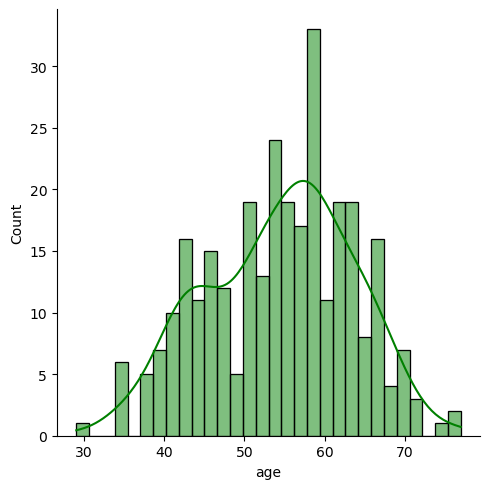

In [16]:
#distribution plots
sns.displot(df['age'], kde=True, bins=30, color='Green'); plt.show()

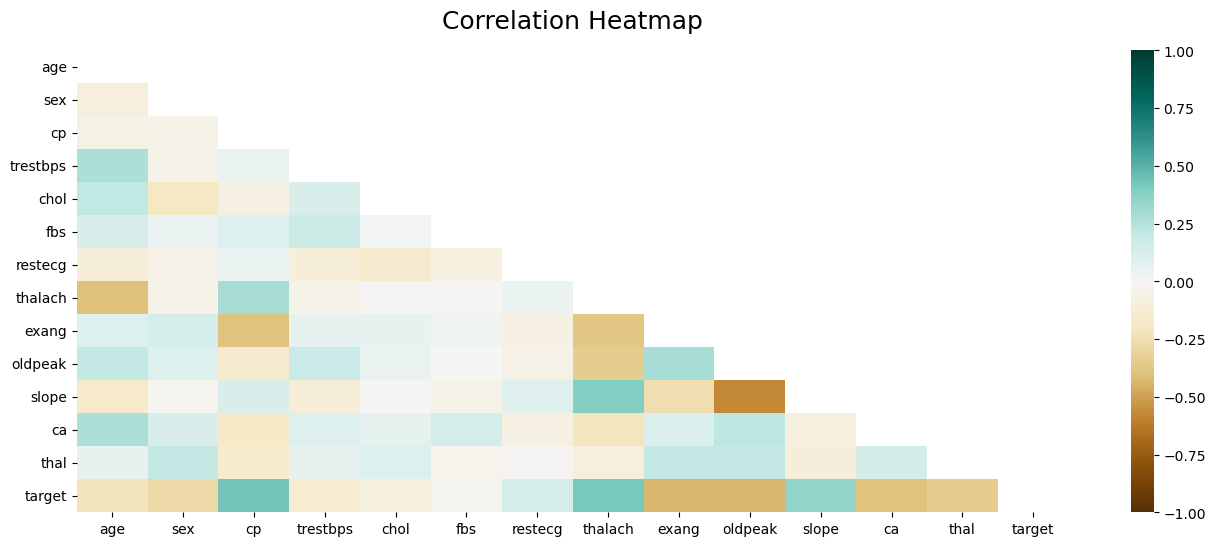

In [17]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

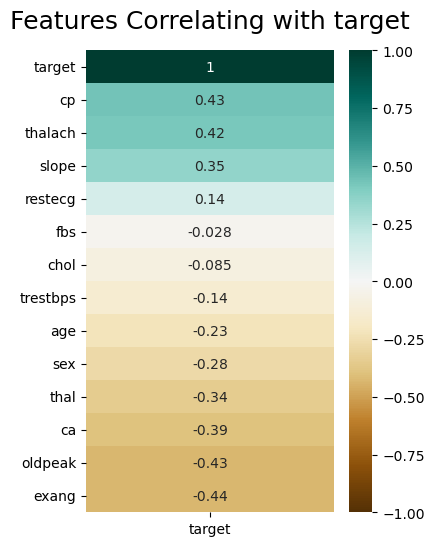

In [18]:
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with target', fontdict={'fontsize':18}, pad=16)
plt.show()

In [19]:
print("How many duplicated rows do we have:",df.duplicated().sum())

How many duplicated rows do we have: 1


# Data Preprocessing

In [20]:
X,y = df.drop('target',axis=1), df['target']

In [21]:
categoricals = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

In [22]:
for column in categoricals:
    dummy = pd.get_dummies(X[column],drop_first=True)
    dummy.columns = [f"{column}_{index}" for index in dummy.columns]
    X = pd.concat([X.drop(column,axis=1),dummy],axis=1)

In [23]:
X.shape

(303, 22)

In [24]:
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,True,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,True,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False


In [25]:
numerical = ['age','trestbps','chol','thalach','oldpeak']

In [26]:
scaler = preprocessing.MinMaxScaler()

In [27]:
X.iloc[:,:5] = scaler.fit_transform(X.iloc[:,:5])

In [28]:
X = X.astype(float)

In [29]:
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Data Preparation

In [30]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(
    X,y,test_size=0.2,random_state=101,shuffle=True,stratify=y)

In [31]:
X_train,y_train = X_train.to_numpy(),y_train.to_numpy()

In [32]:
X_test,y_test = X_test.to_numpy(),y_test.to_numpy()

In [33]:
y_train,y_test = y_train.reshape((-1,1)),y_test.reshape((-1,1))

In [34]:
print(X_train.shape)

(242, 22)


In [35]:
print(X_test.shape)

(61, 22)


In [36]:
print(y_train.shape)

(242, 1)


In [37]:
print(y_test.shape)

(61, 1)


# Neural Network Model from scratch

In [38]:
class NeuralNetwork:

    def __init__(self,insize,h1size,h2size,exsize):

        # saving neuron sizes
        self.insize = insize
        self.h1size = h1size
        self.h2size = h2size
        self.exsize = exsize

        # Initialize weights
        self.W1 = np.random.rand(h1size,insize)
        self.W2 = np.random.rand(h2size,h1size)
        self.W3 = np.random.rand(exsize,h2size)

        # Initializing biases
        self.b1 = np.zeros((h1size,1))
        self.b2 = np.zeros((h2size,1))
        self.b3 = np.zeros((exsize,1))

    @staticmethod
    def sigmoid(x):
        return 1/(1+np.exp(-x))

    @staticmethod
    def sigmoid_derivative(x):
        return x*(1-x)

    def feed_forward(self,X):

        self.Z1 = np.dot(self.W1,X)+self.b1
        self.A1 = self.sigmoid(self.Z1)

        self.Z2 = np.dot(self.W2,self.A1)+self.b2
        self.A2 = self.sigmoid(self.Z2)

        self.Z3 = np.dot(self.W3,self.A2)+self.b3
        self.A3 = self.sigmoid(self.Z3)

    def back_propagate(self,X,Y):

        m = X.shape[1]

        dZ3 = self.A3-Y
        self.dW3 = (1/m)*np.dot(dZ3,self.A2.T)
        self.db3 = (1/m)*np.sum(dZ3,axis=1,keepdims=True)

        dZ2 = np.dot(self.W3.T,dZ3)*self.sigmoid_derivative(self.A2)
        self.dW2 = (1/m)*np.dot(dZ2,self.A1.T)
        self.db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)

        dZ1 = np.dot(self.W2.T,dZ2)*self.sigmoid_derivative(self.A1)
        self.dW1 = (1/m)*np.dot(dZ1,X.T)
        self.db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)

    def update_parameters(self,learning_rate):

        self.W1 -= learning_rate*self.dW1
        self.b1 -= learning_rate*self.db1

        self.W2 -= learning_rate*self.dW2
        self.b2 -= learning_rate*self.db2

        self.W3 -= learning_rate*self.dW3
        self.b3 -= learning_rate*self.db3

    def train(self,X,Y,epochs,learning_rate):

        for epoch in tqdm(range(epochs)):

            self.feed_forward(X)
            self.back_propagate(X,Y)
            self.update_parameters(learning_rate)

    def estimate(self,X):

        self.feed_forward(X)

        return self.A3

    def accuracy(self,X,Y):

        Ypred = self.estimate(X)

        Ypred = (Ypred>0.5).astype(float)

        false_counts = np.abs(Ypred-Y).sum()

        return 1-false_counts/Y.size

In [39]:
X_train.shape

(242, 22)

In [40]:
X_test.shape

(61, 22)

In [41]:
input_size = 22    # number of features in the dataset
hidden1_size = 6  # Number of neurons in the first hidden layer
hidden2_size = 4  # Number of neurons in the second hidden layer
output_size = 1   # For binary classification

In [42]:
nn = NeuralNetwork(input_size,hidden1_size,hidden2_size,output_size)

In [43]:
epochs = 20000
learning_rate = 0.1

In [44]:
nn.train(X_train.T,y_train.T,epochs,learning_rate)

100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:03<00:00, 5042.55it/s]


In [45]:
nn.accuracy(X_test.T,y_test.T)

0.8688524590163934